# 1. Importing data and libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import time
from numpy import argmax
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [141]:
# Create a path
path = r'/Users/marcela/Library/CloudStorage/OneDrive-Personal/CF/Machine Learning/Achievement/Data Sets'

In [142]:
# Delimiting columns displayed
pd.options.display.max_columns = None

In [143]:
# Import pleasant weather answers data set
df_pleasant_weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [144]:
# Import X_cleaned.pkl
X = pd.read_pickle(os.path.join(path, 'X_cleaned.pkl'))

In [145]:
df_pleasant_weather.shape

(22950, 16)

In [146]:
df_pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
X.shape

(22950, 135)

In [148]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

# 2. Data Wrangling

## Valentia Data

In [158]:
# Filter weather dataset to only include Valentia
df_val = X[X.columns[X.columns.astype(str).str.startswith('VALENTIA')]]

# Check output
df_val.head(1)

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [159]:
# Filter pleasant dataset to only include Valentia
val_pleasant = df_pleasant_weather[df_pleasant_weather.columns[df_pleasant_weather.columns.astype(str).str.startswith('VALENTIA')]]

# Check output
val_pleasant.head(1)

,VALENTIA_pleasant_weather
0,0


In [160]:
# Check shape
print(df_val.shape)
print(val_pleasant.shape)

(22950, 9)
(22950, 1)


In [161]:
# Create matrices
y_2 = val_pleasant.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [162]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

# Check shape
print(y_2.shape)

(22950,)


In [163]:
# Create X matrix
X_2 = df_val.to_numpy()

# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [164]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# 3. Hyperparameter Optimization of Random Forest

## Grid Search

In [165]:
# Create random forest classifier
clf_2a = RandomForestClassifier()

In [166]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_2 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [167]:
# Perform hyperparameter tuning using GridSearchCV
start_2a = time.time()
grid_2a = GridSearchCV(clf_2a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_2a = grid_2a.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.754285248120626 minutes


In [168]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_2a.best_params_))
print('Best GRID search score is: '+str(model_grid_2a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
Best GRID search score is: 1.0


## Random Search

In [169]:
# Create random forest classifier
clf_2b = RandomForestClassifier()

In [170]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_2 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [171]:
# Perform hyperparameter tuning using RandomizedSearchCV
start_2b = time.time()
rf_random_2b = RandomizedSearchCV(clf_2b, rs_space_2, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2b = rf_random_2b.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.022339367866516 minutes


In [172]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_2b.best_params_))
print('Best RANDOM search score is: '+str(model_random_2b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 13, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 210}
Best RANDOM search score is: 0.9999418976236129


In [173]:
# Create a random forest classifier using the best results from the searches
clf_2c = RandomForestClassifier(
    n_estimators=10, 
    max_depth=3, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [174]:
# Train the model on the training dataset
# Fit function is used to train the model using the training sets as parameters
clf_2c.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=10)

In [175]:
# Perform predictions on the test dataset
y_pred_2 = clf_2c.predict(X_test_2)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


# 4. Model Evaluation and Feature Importance

## Random Forest

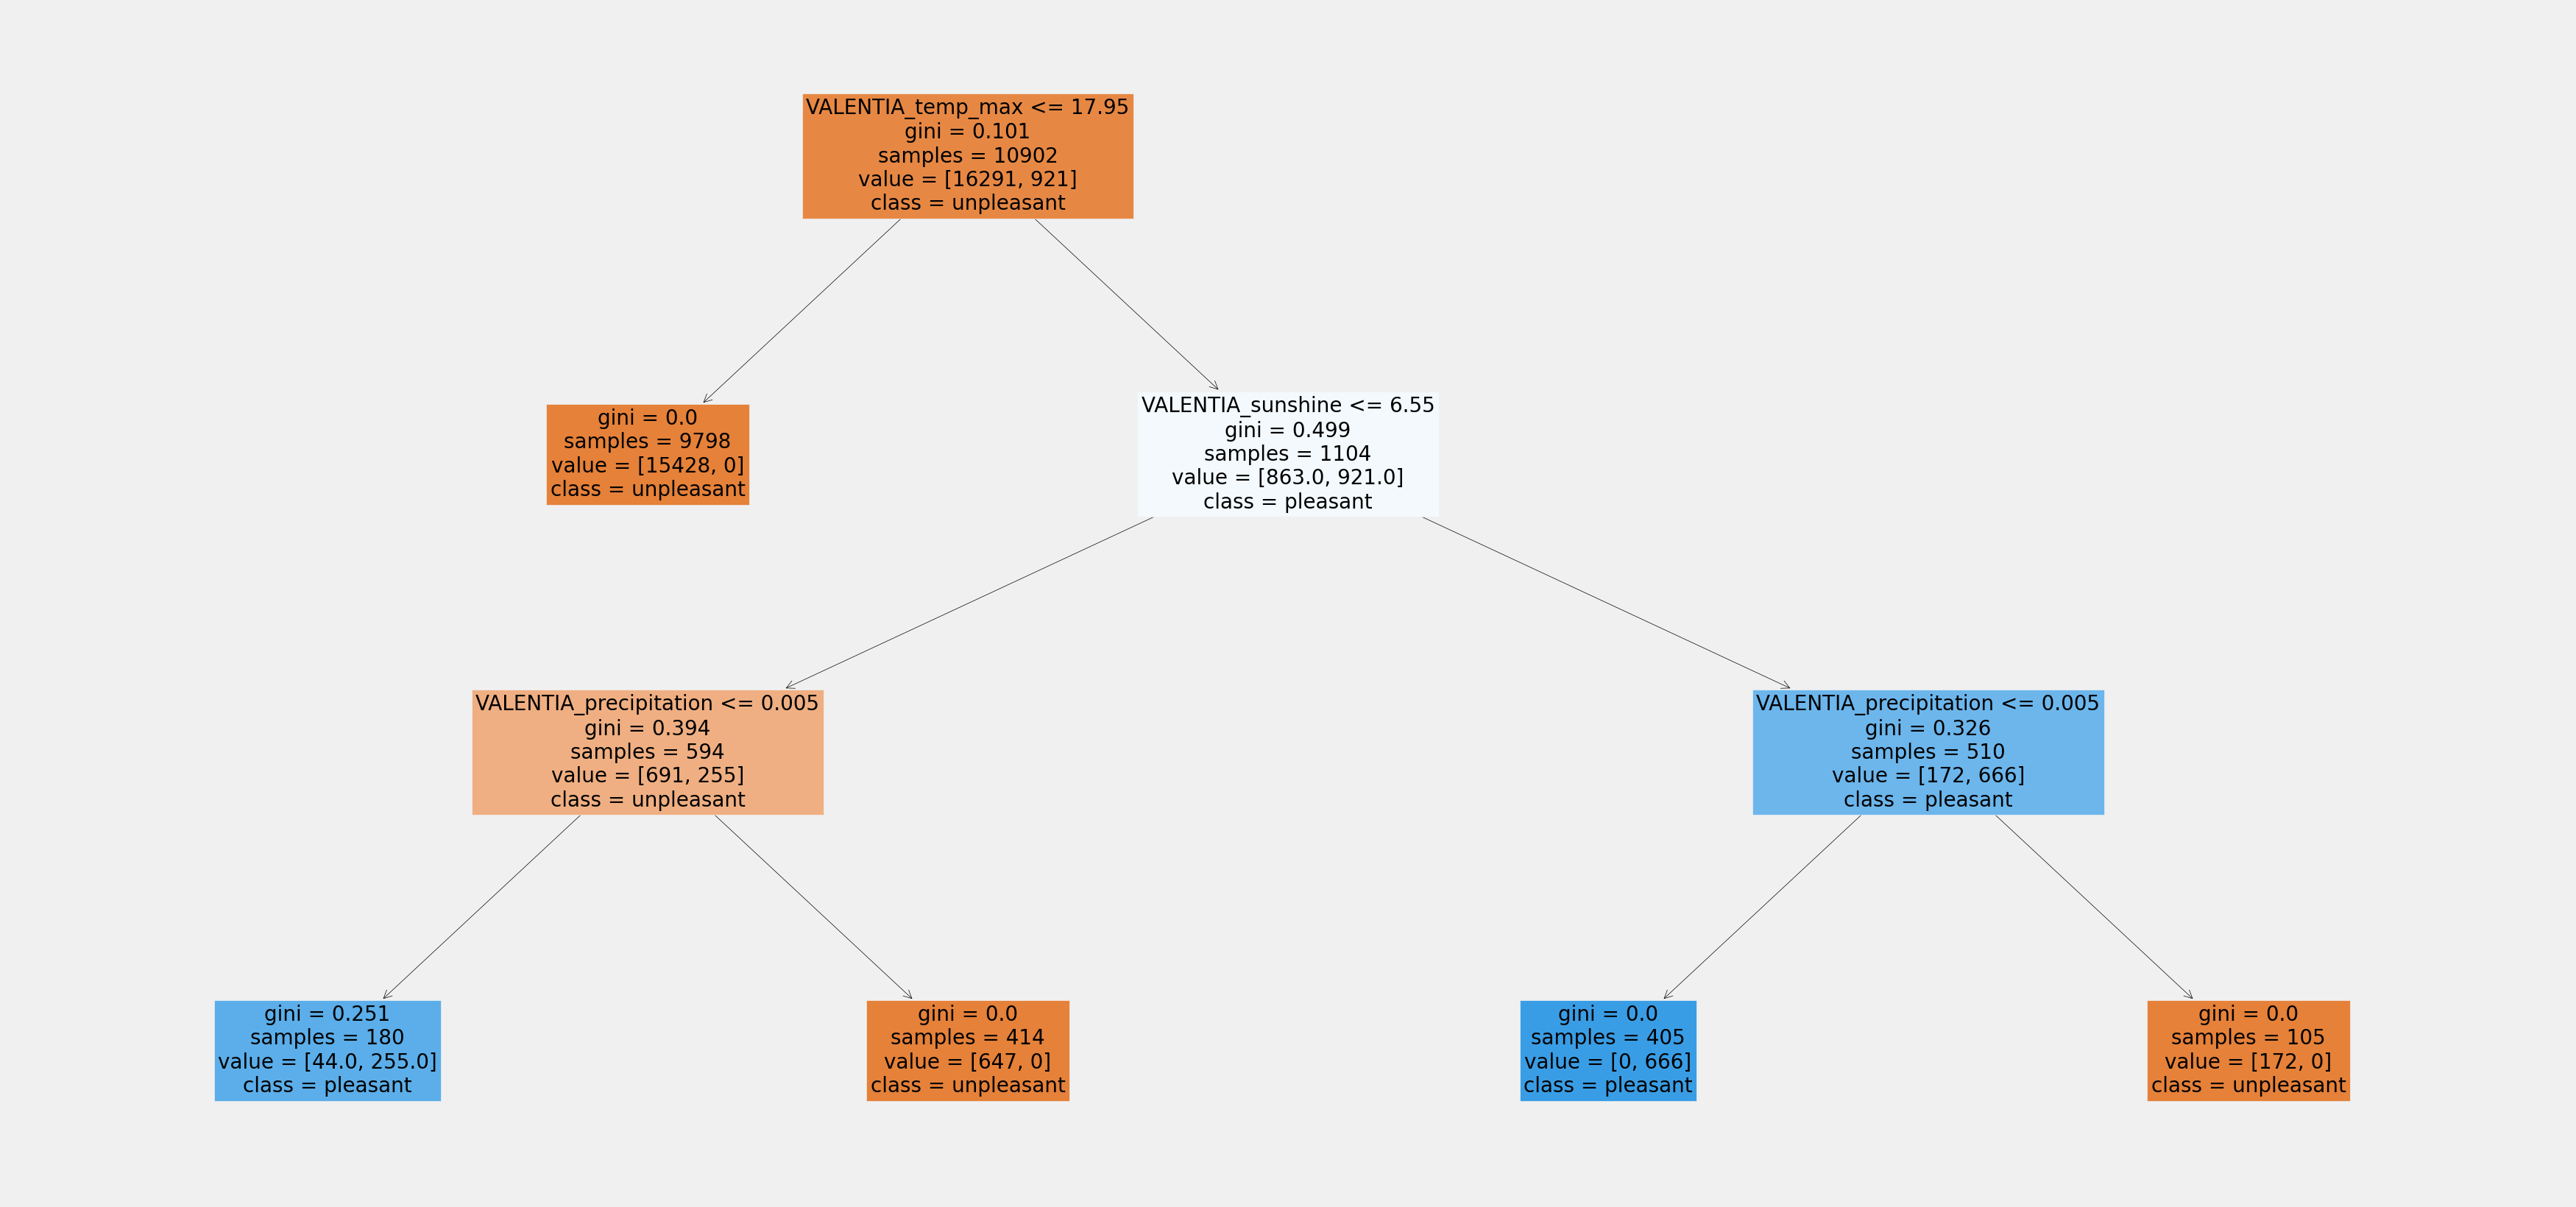

In [177]:
# Plot random forest (Valentia)
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2c.estimators_[5], fontsize = 20, feature_names=df_val.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [179]:
# Export the plot
rf_2.savefig(os.path.join('..', 'Analysis', 'Visualizations', 'random_forest_valentia_optimized.png'),bbox_inches='tight')

[CV 3/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.964 total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.964 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.966 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.998 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimat

### Feature Importances

In [180]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2c.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.04997427 0.         0.00174057 0.         0.3734959  0.04114337
 0.01881698 0.         0.51482891]
(9,)


In [181]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [182]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [183]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.514829
4     precipitation    0.373496
0       cloud_cover    0.049974
5          sunshine    0.041143
6         temp_mean    0.018817
2          pressure    0.001741
1          humidity    0.000000
3  global_radiation    0.000000
7          temp_min    0.000000


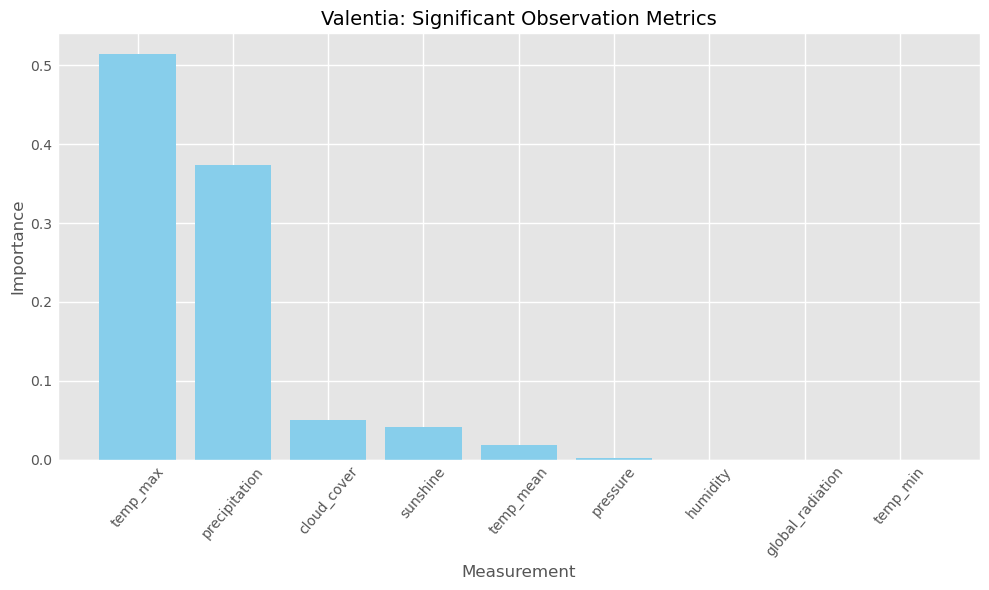

In [184]:
# Plot the importances
plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Valentia: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()